In [10]:
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
DATAFRAMES = os.path.join("..", "..", "..", "results", "dataframes", "")
FIGURES = os.path.join("..", "..", "..", "results", "figures", "")

# Data preprocessing

In [12]:
df = pd.read_csv(os.path.join(DATAFRAMES, "dataframe_profiling.csv"))
df = df.rename(columns={"embedding": "Embedding"})
print(df.columns)

Index(['N', 'Embedding', 'total_time'], dtype='object')


# Figures

<Figure size 640x480 with 0 Axes>

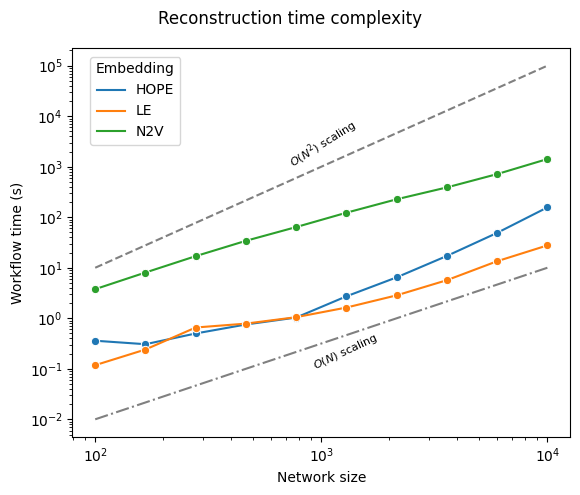

In [84]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df, kind="line",
    x="N", y="total_time",
    hue="Embedding",
    marker="o",
    legend=True
)

# Adjust axes
g.ax.set_xscale('log')
g.ax.set_yscale('log')
g.ax.set_xlabel('Network size')
g.ax.set_ylabel('Workflow time (s)')
sns.despine(g.fig, offset=0.1, top=False, right=False, bottom=False, left=False)

# Adjust figure
plt.plot(
    [100, 10_000], [0.01, 10],  # slope = 1
    linestyle="-.", color="gray")#, label=r"$O(N)$")
plt.plot(
    [100, 10_000], [10, 100_000],  # 'slope' = 1/10
    linestyle="--", color="gray")#, label=r"$O(N^2)$")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Reconstruction time complexity")

plt.text(9*10**2, 10**-1, r"$O(N)$ scaling", fontdict={"size": 8}, rotation=25)
plt.text(7*10**2, 10**3, r"$O(N^2)$ scaling", fontdict={"size": 8}, rotation=32)

sns.move_legend(g, loc="upper left", bbox_to_anchor=(0.15, 0.90), title="Embedding", frameon=True)

# Save to disk
plt.tight_layout()
g.savefig(os.path.join(FIGURES, "figure_time-N_hue-embedding.png"), transparent=False, facecolor="white")